In [ ]:
!pip install tensorflow==2.11.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-9np4mx5k
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-9np4mx5k
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit ce29510c83d924561c9e6054641d02a5abdeaaf5
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431851 sha256=0969329fc122d43540597acb03f42bf63318bc5e986ce814b79698afb913bff5
  Stored in directory: /tmp/pip-ephem-wheel-cache-7td7387o/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph


In [ ]:
import pandas as pd
from stellargraph import StellarGraph

In [ ]:
df_edges = pd.read_csv('/content/drive/MyDrive/full_edges_hashtag_retweets_df.csv')
df_edges

,source,target
0,875029068223315968,875029068223315968
1,827641495125688321,827641495125688321
2,712342794132586497,712342794132586497
3,1013540804827152386,1013540804827152386
4,811007544080662532,811007544080662532
...,...,...
175070,1046023987,763935668284239872
175071,2467720274,850727236281958401
175072,14247236,825034446667673602
175073,983766825610694656,940374803566825478


In [ ]:
node_features_df = pd.read_csv('/content/drive/MyDrive/node_features_hashtag_retweets_df_1.csv')
node_features_df = node_features_df.set_index("Unnamed: 0")
node_features_df

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
18655355,-0.025092,-0.013277,0.000165,-0.012159,-0.021471,-0.009224,0.015741,-0.005924,-0.010628,-0.001045,...,0.007013,0.020328,0.020277,-0.052243,-0.039589,0.036438,0.004552,-0.031432,0.005098,-0.048863
321631653,-0.008838,-0.003348,-0.002545,-0.005868,-0.009245,-0.007616,-0.002027,-0.010639,0.003906,-0.013017,...,0.012564,0.002523,0.000441,-0.036351,-0.033197,0.014785,-0.011453,-0.008253,-0.001263,-0.012649
3176702526,-0.033441,0.007639,0.011272,-0.020217,-0.014326,-0.012251,-0.011775,-0.008428,0.001179,-0.016013,...,0.013482,0.000267,0.022843,-0.017101,-0.014816,0.041604,-0.030829,-0.029713,-0.006986,-0.012421
2467720274,-0.018883,0.012830,-0.005051,-0.026876,-0.022091,0.019142,0.003460,-0.008840,-0.010813,0.006861,...,0.026928,-0.020810,0.012850,-0.024522,-0.026100,0.028920,-0.027937,-0.001698,-0.014822,-0.041310
1646856415,-0.023549,0.022269,0.016126,-0.011945,-0.023042,-0.013896,-0.018456,-0.016138,-0.001159,-0.009190,...,0.029464,0.010394,0.020293,-0.011363,-0.042715,0.023485,-0.031137,-0.013845,0.002560,-0.043475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23194229,-0.012957,0.003651,-0.010529,-0.003795,-0.021111,-0.000736,-0.037604,-0.008705,-0.014039,-0.028734,...,0.013409,-0.006560,0.039073,-0.017923,-0.043298,0.026228,-0.024562,0.015837,0.021754,-0.014761
899115298997055491,-0.029683,-0.013164,0.002998,-0.006640,-0.013515,0.003740,-0.022243,-0.013463,0.006927,-0.022620,...,0.014126,0.001460,0.023947,-0.030047,-0.041520,0.035511,-0.015882,-0.004071,0.018367,0.002634
807692474684579840,-0.023476,0.022063,0.017146,-0.009815,-0.018611,0.022691,-0.012850,0.000282,0.002191,-0.006023,...,0.009698,-0.004901,0.001926,-0.020088,-0.025934,0.025934,-0.013235,0.009887,0.005202,-0.014229


In [ ]:
G = StellarGraph(node_features_df, df_edges)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 4944, Edges: 175075

 Node types:
  default: [4944]
    Features: float32 vector, length 1536
    Edge types: default-default->default

 Edge types:
    default-default->default: [175075]
        Weights: all 1 (default)
        Features: none


In [ ]:
G.check_graph_for_ml(features=True)

In [ ]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

import numpy as np

In [ ]:
fullbatch_generator = FullBatchNodeGenerator(G, sparse=False)
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)

corrupted_generator = CorruptedGenerator(fullbatch_generator)
gen = corrupted_generator.flow(G.nodes())

Using GCN (local pooling) filters...


In [ ]:
infomax = DeepGraphInfomax(gcn_model, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))

In [ ]:
epochs = 500

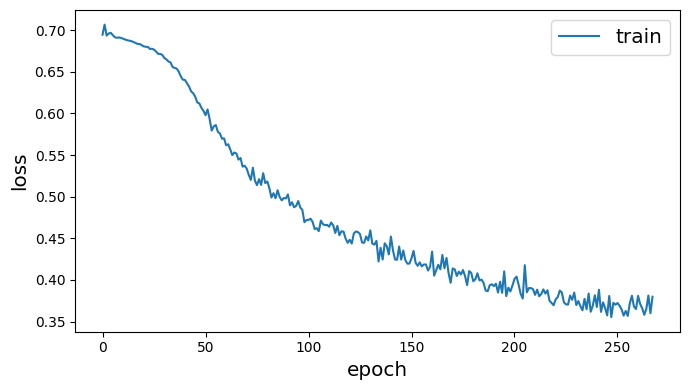

In [ ]:
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])
plot_history(history)

In [ ]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)

In [ ]:
all_embeddings = emb_model.predict(fullbatch_generator.flow(G.nodes()))
print(type(all_embeddings))
np.shape(all_embeddings)

1/1 [==============================] - 1s 1s/step
<class 'numpy.ndarray'>


(4944, 128)

In [ ]:
np.save('/content/drive/MyDrive/full_hashtag_retweets_embeddings_GCN.npy', all_embeddings)